In [5]:
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pprint import pprint

In [6]:
path = '10.Advertising.csv'
# 手写读取数据 - 请自行分析，在10.2.Iris代码中给出类似的例子
f = file(path)
x = []
y = []
for i, d in enumerate(f):
    if i == 0:
        continue
    d = d.strip()
    if not d:
        continue
    d = map(float, d.split(','))
    x.append(d[1:-1])
    y.append(d[-1])
pprint(x)
pprint(y)

[[230.1, 37.8, 69.2],
 [44.5, 39.3, 45.1],
 [17.2, 45.9, 69.3],
 [151.5, 41.3, 58.5],
 [180.8, 10.8, 58.4],
 [8.7, 48.9, 75.0],
 [57.5, 32.8, 23.5],
 [120.2, 19.6, 11.6],
 [8.6, 2.1, 1.0],
 [199.8, 2.6, 21.2],
 [66.1, 5.8, 24.2],
 [214.7, 24.0, 4.0],
 [23.8, 35.1, 65.9],
 [97.5, 7.6, 7.2],
 [204.1, 32.9, 46.0],
 [195.4, 47.7, 52.9],
 [67.8, 36.6, 114.0],
 [281.4, 39.6, 55.8],
 [69.2, 20.5, 18.3],
 [147.3, 23.9, 19.1],
 [218.4, 27.7, 53.4],
 [237.4, 5.1, 23.5],
 [13.2, 15.9, 49.6],
 [228.3, 16.9, 26.2],
 [62.3, 12.6, 18.3],
 [262.9, 3.5, 19.5],
 [142.9, 29.3, 12.6],
 [240.1, 16.7, 22.9],
 [248.8, 27.1, 22.9],
 [70.6, 16.0, 40.8],
 [292.9, 28.3, 43.2],
 [112.9, 17.4, 38.6],
 [97.2, 1.5, 30.0],
 [265.6, 20.0, 0.3],
 [95.7, 1.4, 7.4],
 [290.7, 4.1, 8.5],
 [266.9, 43.8, 5.0],
 [74.7, 49.4, 45.7],
 [43.1, 26.7, 35.1],
 [228.0, 37.7, 32.0],
 [202.5, 22.3, 31.6],
 [177.0, 33.4, 38.7],
 [293.6, 27.7, 1.8],
 [206.9, 8.4, 26.4],
 [25.1, 25.7, 43.3],
 [175.1, 22.5, 31.5],
 [89.7, 9.9, 35.7],
 [239

In [7]:
x = np.array(x)
y = np.array(y)
x,y

(array([[ 230.1,   37.8,   69.2],
        [  44.5,   39.3,   45.1],
        [  17.2,   45.9,   69.3],
        [ 151.5,   41.3,   58.5],
        [ 180.8,   10.8,   58.4],
        [   8.7,   48.9,   75. ],
        [  57.5,   32.8,   23.5],
        [ 120.2,   19.6,   11.6],
        [   8.6,    2.1,    1. ],
        [ 199.8,    2.6,   21.2],
        [  66.1,    5.8,   24.2],
        [ 214.7,   24. ,    4. ],
        [  23.8,   35.1,   65.9],
        [  97.5,    7.6,    7.2],
        [ 204.1,   32.9,   46. ],
        [ 195.4,   47.7,   52.9],
        [  67.8,   36.6,  114. ],
        [ 281.4,   39.6,   55.8],
        [  69.2,   20.5,   18.3],
        [ 147.3,   23.9,   19.1],
        [ 218.4,   27.7,   53.4],
        [ 237.4,    5.1,   23.5],
        [  13.2,   15.9,   49.6],
        [ 228.3,   16.9,   26.2],
        [  62.3,   12.6,   18.3],
        [ 262.9,    3.5,   19.5],
        [ 142.9,   29.3,   12.6],
        [ 240.1,   16.7,   22.9],
        [ 248.8,   27.1,   22.9],
        [  70.

In [8]:
# Python自带库
f = file(path, 'r')
print f
d = csv.reader(f)
for line in d:
    print line
f.close()

<open file '10.Advertising.csv', mode 'r' at 0x000000000C414A50>
['', 'TV', 'Radio', 'Newspaper', 'Sales']
['1', '230.1', '37.8', '69.2', '22.1']
['2', '44.5', '39.3', '45.1', '10.4']
['3', '17.2', '45.9', '69.3', '9.3']
['4', '151.5', '41.3', '58.5', '18.5']
['5', '180.8', '10.8', '58.4', '12.9']
['6', '8.7', '48.9', '75', '7.2']
['7', '57.5', '32.8', '23.5', '11.8']
['8', '120.2', '19.6', '11.6', '13.2']
['9', '8.6', '2.1', '1', '4.8']
['10', '199.8', '2.6', '21.2', '10.6']
['11', '66.1', '5.8', '24.2', '8.6']
['12', '214.7', '24', '4', '17.4']
['13', '23.8', '35.1', '65.9', '9.2']
['14', '97.5', '7.6', '7.2', '9.7']
['15', '204.1', '32.9', '46', '19']
['16', '195.4', '47.7', '52.9', '22.4']
['17', '67.8', '36.6', '114', '12.5']
['18', '281.4', '39.6', '55.8', '24.4']
['19', '69.2', '20.5', '18.3', '11.3']
['20', '147.3', '23.9', '19.1', '14.6']
['21', '218.4', '27.7', '53.4', '18']
['22', '237.4', '5.1', '23.5', '12.5']
['23', '13.2', '15.9', '49.6', '5.6']
['24', '228.3', '16.9', '

In [9]:
# numpy读入
p = np.loadtxt(path, delimiter=',', skiprows=1)
print p
print '\n\n===============\n\n'

[[   1.   230.1   37.8   69.2   22.1]
 [   2.    44.5   39.3   45.1   10.4]
 [   3.    17.2   45.9   69.3    9.3]
 [   4.   151.5   41.3   58.5   18.5]
 [   5.   180.8   10.8   58.4   12.9]
 [   6.     8.7   48.9   75.     7.2]
 [   7.    57.5   32.8   23.5   11.8]
 [   8.   120.2   19.6   11.6   13.2]
 [   9.     8.6    2.1    1.     4.8]
 [  10.   199.8    2.6   21.2   10.6]
 [  11.    66.1    5.8   24.2    8.6]
 [  12.   214.7   24.     4.    17.4]
 [  13.    23.8   35.1   65.9    9.2]
 [  14.    97.5    7.6    7.2    9.7]
 [  15.   204.1   32.9   46.    19. ]
 [  16.   195.4   47.7   52.9   22.4]
 [  17.    67.8   36.6  114.    12.5]
 [  18.   281.4   39.6   55.8   24.4]
 [  19.    69.2   20.5   18.3   11.3]
 [  20.   147.3   23.9   19.1   14.6]
 [  21.   218.4   27.7   53.4   18. ]
 [  22.   237.4    5.1   23.5   12.5]
 [  23.    13.2   15.9   49.6    5.6]
 [  24.   228.3   16.9   26.2   15.5]
 [  25.    62.3   12.6   18.3    9.7]
 [  26.   262.9    3.5   19.5   12. ]
 [  27.   14

In [10]:
# pandas读入
data = pd.read_csv(path)    # TV、Radio、Newspaper、Sales
# x = data[['TV', 'Radio', 'Newspaper']]
x = data[['TV', 'Radio']]
y = data['Sales']
print x
print y

        TV  Radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
5      8.7   48.9
6     57.5   32.8
7    120.2   19.6
8      8.6    2.1
9    199.8    2.6
10    66.1    5.8
11   214.7   24.0
12    23.8   35.1
13    97.5    7.6
14   204.1   32.9
15   195.4   47.7
16    67.8   36.6
17   281.4   39.6
18    69.2   20.5
19   147.3   23.9
20   218.4   27.7
21   237.4    5.1
22    13.2   15.9
23   228.3   16.9
24    62.3   12.6
25   262.9    3.5
26   142.9   29.3
27   240.1   16.7
28   248.8   27.1
29    70.6   16.0
..     ...    ...
170   50.0   11.6
171  164.5   20.9
172   19.6   20.1
173  168.4    7.1
174  222.4    3.4
175  276.9   48.9
176  248.4   30.2
177  170.2    7.8
178  276.7    2.3
179  165.6   10.0
180  156.6    2.6
181  218.5    5.4
182   56.2    5.7
183  287.6   43.0
184  253.8   21.3
185  205.0   45.1
186  139.5    2.1
187  191.1   28.7
188  286.0   13.9
189   18.7   12.1
190   39.5   41.1
191   75.5   10.8
192   17.2    4.1
193  166.8

C:\Users\jason\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


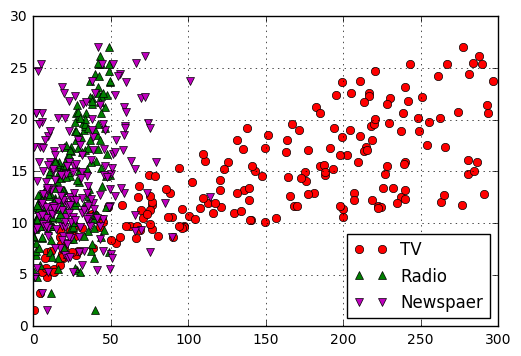

In [11]:
# 绘制1
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.grid()
plt.show()

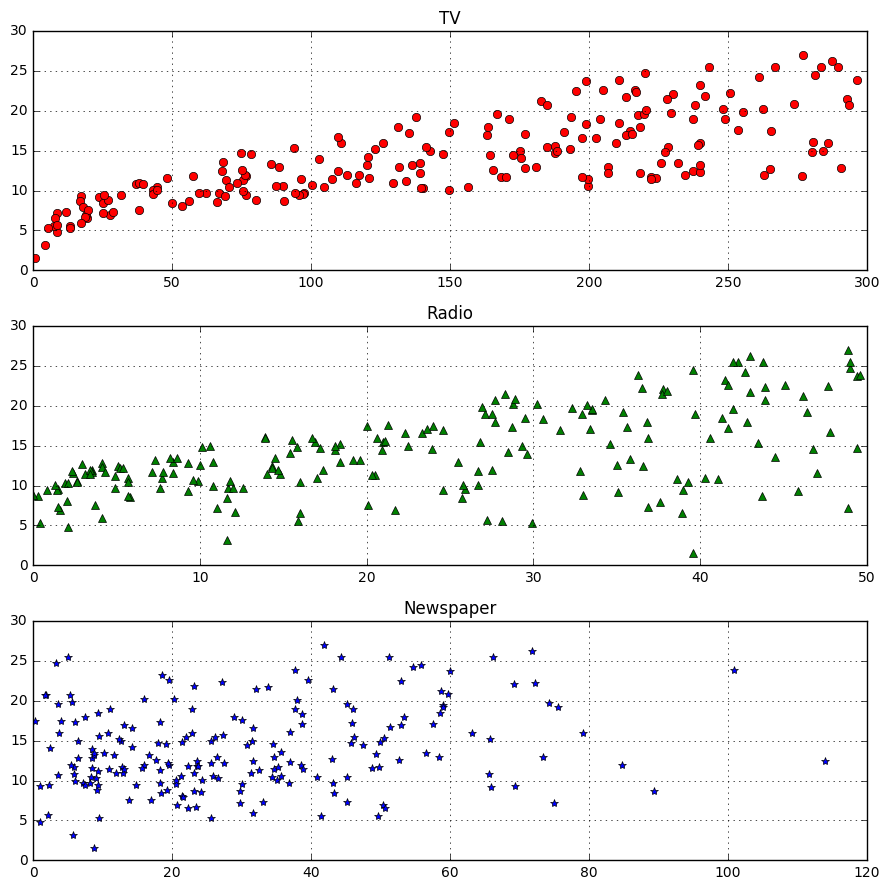

In [12]:
plt.figure(figsize=(9,9))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
# print x_train, y_train
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print model
print "---------------"
print linreg.coef_
print linreg.intercept_

y_hat = linreg.predict(x_test)
mse = np.mean((y_hat - y_test) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print mse, rmse

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
---------------
[ 0.04686997  0.1800065 ]
2.94751503603
1.95522188501 1.39829248908


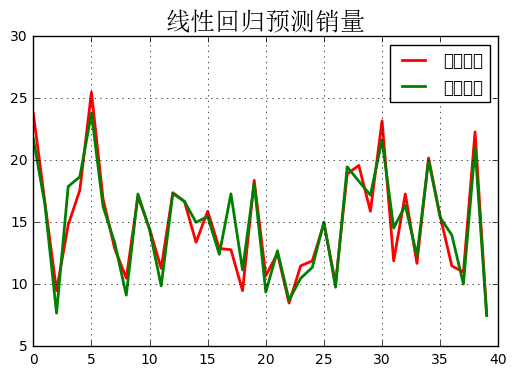

In [35]:
#coding:utf-8
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
myfont = matplotlib.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\simsun.ttc')  

t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据',)
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.legend(loc='upper right')
plt.title(u'线性回归预测销量', fontsize=18,fontproperties=myfont)
plt.title(u'线性回归预测销量', fontsize=18,fontproperties=myfont)
plt.grid()
plt.show()

In [110]:
import matplotlib
matplotlib.matplotlib_fname()

u'C:\\Users\\jason\\Anaconda2\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

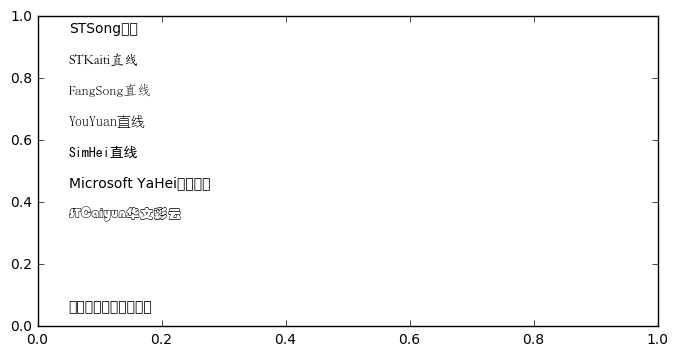

In [27]:
# -*- coding: utf-8 -*- 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  #设置缺省字体  
plt.figure(figsize=(8,4)) 
a = plt.text(0.05, 0.05, u"直线和二次曲线的交点") 
#Microsoft YaHei,FangSong,YouYuan,SimHei,STKaiti,STSong,SimSun-ExtB,Webdings 
plt.text(0.05, 0.95,u"STSong直线") 
#plt.text(0.05, 0.95,u"STSong直线",fontproperties='STSong'  ) 
plt.text(0.05, 0.85, u"STKaiti直线", fontproperties='STKaiti') 
plt.text(0.05, 0.75, u"FangSong直线", fontproperties='FangSong') 
plt.text(0.05, 0.65, u"YouYuan直线", fontproperties='YouYuan') 
plt.text(0.05, 0.55, u"SimHei直线", fontproperties='SimHei') 
plt.text(0.05, 0.45, u"Microsoft YaHei微软雅黑", fontproperties='Microsoft YaHei')  
plt.text(0.05, 0.35, u"STCaiyun华文彩云", fontproperties='STCaiyun')  
plt.show() 